# Data Issues:

In [107]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


## First, we want to load checkout data from a XSLX file into a DataFrame to
## ## understand if null values, duplication exisit along with the various data types.

## LOAD CHECKOUT DATA ##
## Attention: Be sure to change the line below to your system directory 
system_dir = '/Users/abbey/Desktop/takehometestfromaffirm/'
file_path = system_dir + 'homework_checkouts.xlsx' 
# Read the CSV file into a DataFrame
df = pd.read_excel(file_path)
# Print the column names (header)
print(df.columns)
# Print the first 5 rows of the DataFrame
print(df.head())



Index(['user_id', 'checkout_id', 'checkout_ts', 'is_approved', 'is_authed',
       'loan_amount', 'apr', 'fico_score'],
      dtype='object')
          user_id       checkout_id             checkout_ts  is_approved  \
0  6906-4922-IYOH  7IKNXN456VQ3LW4M 2016-11-09 00:23:11.568            1   
1  6016-3178-UPRT  FCBPQU1VSUHBVK2P 2016-11-09 00:23:29.475            1   
2  3510-6742-URLG  D3Y6DRVAV3KAP1PJ 2016-11-09 00:41:05.925            1   
3  3545-1484-KFVW  AHU3JKWBLS4XPQKF 2016-11-09 02:01:01.820            1   
4  9223-3913-GZTA  0S731350Z125SGJN 2016-11-09 03:35:31.451            0   

   is_authed  loan_amount   apr  fico_score  
0          0          513    IB       780.0  
1          1          412    IB       640.0  
2          1          270  Zero       650.0  
3          1          168  Zero       720.0  
4          0          116    IB       610.0  


In [108]:
import pandas as pd

 # Check for missing values
print("\nMissing values for each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Check the data types of each column
print("\nData types:")
print(df.dtypes)



Missing values for each column:
user_id         0
checkout_id     0
checkout_ts     0
is_approved     0
is_authed       0
loan_amount     0
apr             0
fico_score     11
dtype: int64

Duplicate rows:
0

Summary statistics:
                         checkout_ts  is_approved    is_authed  loan_amount  \
count                           1814  1814.000000  1814.000000  1814.000000   
mean   2016-11-25 09:31:52.961950976     0.805954     0.651599   402.572216   
min       2016-11-09 00:23:11.568000     0.000000     0.000000    83.000000   
25%    2016-11-18 05:10:10.373250048     1.000000     0.000000   166.250000   
50%    2016-11-27 15:55:44.461999872     1.000000     1.000000   267.000000   
75%    2016-12-01 05:17:54.871750144     1.000000     1.000000   462.500000   
max       2016-12-08 23:35:09.955000     1.000000     1.000000  5703.000000   
std                              NaN     0.395574     0.476595   442.468012   

        fico_score  
count  1803.000000  
mean    695.8735

In [109]:
# # Data Type Overview
# The data types of the columns are as follows:
# - `user_id` is an 12 char integer  
# - `checkout_id` is a 16 char integer     
# - `checkout_ts` is a datetime object   
# - `is_approved` is an integer-boolean (0 or 1)
# - 'is_authed' is an integer-boolean (0 or 1)  
# - 'loan_amount' is a interger, zero decimal places
# - 'apr' is a object with string values: Zero interest, IB for loan make 5% of loan amount in revenue 
# - 'fico_score' is a float , one decimal place

# # Data Quality Issues
# - There are no duplicate rows in the dataset.
# - There are missing values in the `fico_score` column. Further investagation below.
# Filter rows where fico_score is null
null_fico_score_df = df[df['fico_score'].isnull()]
# Print the rows with null fico_score
print(null_fico_score_df)


# Observations: #
## There are 11 rows with missing values in the `fico_score` column. 
## I noticed that almost all except one of the rows are users who have not had
## their loan approved nor authenticated. This could be the reason why the `fico_score` is missing.
## The missing values in the `fico_score` column could be due to the fact that the loan was not approved or authenticated for these users.
## For the purpose of exploring the data, I will check the size of missing data in relation to all checkout data. 
## If the percentage is less than 5%, I will drop the rows with missing values in the `fico_score` column for better data quality. 

# Calculate the number of rows with missing FICO scores
missing_fico_scores = df['fico_score'].isnull().sum()

# Calculate the total number of rows
total_rows = df.shape[0]

# Calculate the percentage of rows with missing FICO scores
percentage_missing_fico_scores = round((missing_fico_scores / total_rows),2) * 100

print(f"Percentage of rows with missing FICO scores: {percentage_missing_fico_scores}%")
# The percentage of rows with missing FICO scores is 1%. Therefore, I will drop the rows with missing values in the `fico_score` column for better data quality.
df = df.dropna(subset=['fico_score'])

             user_id       checkout_id             checkout_ts  is_approved  \
141   3129-8352-SJXB  CTVOLGVSRTWEMZG9 2016-11-12 05:51:40.161            0   
394   9237-0485-THEO  HDPY66DN9JNAK63H 2016-11-17 01:56:40.393            1   
446   2821-9223-UCXA  C92HWTL3ZE8ZQSR1 2016-11-18 02:35:19.839            0   
600   7438-6102-OYML  U0WEPNGHQH5NFNS9 2016-11-21 13:27:49.416            0   
932   7084-2393-EVUZ  4MIPKY9IMAC4NK8V 2016-11-27 18:26:08.549            0   
1360  2832-1835-WNLC  SCJOCCGKOT2WOF5X 2016-12-01 05:21:01.415            0   
1496  8140-1566-KXHF  FUZKOB1M11UYXYRP 2016-12-03 13:19:33.274            0   
1512  6807-5922-SDDM  AS9QYYOQ7HGTQQTM 2016-12-03 19:28:58.153            0   
1691  9578-8002-UBSX  D09FSSQT36V3Y4G1 2016-12-06 20:45:35.469            0   
1746  3140-6292-ROIU  XXYDCEZO6VXTK71T 2016-12-07 17:32:13.366            0   
1755  2559-3047-SDZI  WTKR0TC69XHU6XCE 2016-12-07 20:20:34.517            0   

      is_authed  loan_amount   apr  fico_score  
14

# Conversion Rates:

            Stage  Conversion Rate (%)  Average Loan Amount  Median FICO Score
0  Start Checkout               100.00               402.85              690.0
1        Decision                81.03               400.69              700.0
2          Authed                80.84               360.11              710.0


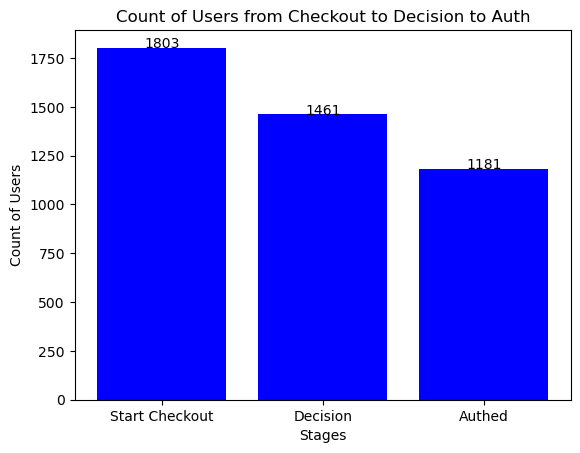

In [110]:
# Calculate the number of users who started the checkout process
start_checkout = df['checkout_id'].nunique()
# Calculate the average loan amount and median FICO score for users who started the checkout process
avg_loan_amount_checkout = round(df['loan_amount'].mean(),2)
median_fico_score_checkout = df['fico_score'].median()

# Calculate the number of users who got approved or declined
decision = df[df['is_approved'] != 0]['checkout_id'].nunique()
# Calculate the average loan amount and median FICO score for users who got approved or declined
avg_loan_amount_decision = round(df[df['is_approved'] != 0]['loan_amount'].mean(),2)
median_fico_score_decision = df[df['is_approved'] != 0]['fico_score'].median()

# Calculate the number of users who got authed
authed = df[df['is_authed'] != 0]['checkout_id'].nunique()
# Calculate the average loan amount and median FICO score for users who got authed
avg_loan_amount_authed = round(df[df['is_authed'] != 0]['loan_amount'].mean(),2)
median_fico_score_authed = df[df['is_authed'] != 0]['fico_score'].median()

# Calculate the conversion rates
conversion_rate_decision = round(decision / start_checkout * 100,2)
conversion_rate_authed = round(authed / decision * 100,2)
# Calculate the overall conversion rate from Start Checkout to Authed
conversion_rate_overall = round(authed / start_checkout * 100,2)

# Display the results for the stages, the conversion rates, the average loan amounts, and the median FICO scores in table format
data = {
    'Stage': ['Start Checkout', 'Decision', 'Authed'],
    'Conversion Rate (%)': [100, conversion_rate_decision, conversion_rate_authed],
    'Average Loan Amount': [avg_loan_amount_checkout, avg_loan_amount_decision, avg_loan_amount_authed],
    'Median FICO Score': [median_fico_score_checkout, median_fico_score_decision, median_fico_score_authed]
}
# Create the DataFrame
df_table = pd.DataFrame(data)
# Print the result
print(df_table)

# Create a bar chart to visualize the count of users from Start Checkout to Decision to Authed
# Define the stages and counts
stages = ['Start Checkout', 'Decision', 'Authed']
counts = [start_checkout, decision, authed]
# Create the bar chart
plt.bar(stages, counts, color='blue')
# Add the count above each bar
for i in range(len(counts)):
    plt.text(i, counts[i], counts[i], ha = 'center')
# Add labels and title
plt.xlabel('Stages')
plt.ylabel('Count of Users')
plt.title('Count of Users from Checkout to Decision to Auth')
# Show the plot
plt.show()


# Insights:

##### Insight #1: Acquisition Cost for Ideal Users

In [148]:

from pandasql import sqldf
import pandas as pd
# Define a global function to make it easier to use pandasql
pysqldf = lambda q: sqldf(q, globals())
# Read the data from the Excel files
checkouts_df = pd.read_excel(system_dir+'homework_checkouts.xlsx')
email_list_df = pd.read_excel( system_dir+'email_list_homework.xlsx')
servicing_df = pd.read_excel( system_dir+'servicing_homework.xlsx')

# Convert the DataFrames to SQL tables

# Given the median FICO score for users who got approved is 700 and authed 710, we can filter the users who have a FICO score greater than or equal to 700   
# The goal of the query is to find the total revenue, total users, average loan amount, and total cost for users who have a FICO score greater than or equal to 700 who are in the email list
## Cacluating the ROI for each loan type given the marketing efforts to email these users

query = """
SELECT
    apr,
    SUM(CASE WHEN is_authed = 1 THEN loan_amount * (CASE WHEN apr = 'IB' THEN 0.02 ELSE 0.05 END) ELSE 0 END) AS total_revenue,
    COUNT(DISTINCT ch.user_id) AS total_users,
    AVG(loan_amount) AS avg_loan_amount,
    COUNT(DISTINCT ch.user_id) * 35 AS total_cost,
    SUM(CASE WHEN is_authed = 1 THEN loan_amount * (CASE WHEN apr = 'IB' THEN 0.02 ELSE 0.05 END) ELSE 0 END) / COUNT(DISTINCT ch.user_id) AS revenue_per_user
FROM
    checkouts_df ch
JOIN
    email_list_df el
ON
    ch.user_id = el.user_id
WHERE
    ch.fico_score >= 700
GROUP BY
    apr;
"""
result = pysqldf(query)
# Calculate the ROI for each group
result['roi'] = (result['total_revenue'] - result['total_cost']) / result['total_cost'] * 100
# Print the result
print(result)

    apr  total_revenue  total_users  avg_loan_amount  total_cost  \
0    IB         786.50           73       432.142857        2555   
1  Zero        2939.45          170       460.392857        5950   

   revenue_per_user        roi  
0         10.773973 -69.217221  
1         17.290882 -50.597479  


##### Insight #2:  Revenue-Loss Recovery


In [149]:
# Calculate the money recovered and unrecovered
# The goal of the query is to find the total revenue, total loan amount, average contacts,
## total contacts, total cost, and ROI for contact-efforts for revenue recovered vs not recovered
query1 = """
SELECT
    is_charge_off,
    SUM(CASE WHEN is_authed = 1 THEN loan_amount * (CASE WHEN apr = 'IB' THEN 0.02 ELSE 0.05 END) ELSE 0 END) AS total_revenue,
    SUM(loan_amount) AS total_loan_amount,
    AVG(contacts) AS avg_contacts,
    SUM(contacts) AS total_contacts,
    SUM(contacts)*30  AS total_cost,
    ((SUM(CASE WHEN is_authed = 1 THEN loan_amount * (CASE WHEN apr = 'IB' THEN 0.02 ELSE 0.05 END) ELSE 0 END) - SUM(contacts)*30 ) / (SUM(contacts)*30))*100.0 AS roi 
FROM
    checkouts_df
JOIN
    servicing_df
ON
    checkouts_df.checkout_id = servicing_df.checkout_id
GROUP BY
    is_charge_off;
"""
result1 = pysqldf(query1)
print(result1)

# ROI = (Potential Revenue Recovery - Total Contact Cost) / Total Contact Cost * 100%
# These SQL queries provide a quantitative analysis of the ROI for each recommendation, helping to evaluate the effectiveness of the proposed strategies in improving business outcomes.

   is_charge_off  total_revenue  total_loan_amount  avg_contacts  \
0              0         648.09              30787           1.0   
1              1         230.00              10940           5.0   

   total_contacts  total_cost        roi  
0              91        2730 -76.260440  
1             180        5400 -95.740741  
